In [1]:
import pandas as pd
import numpy as np
import random as rd
import math
import matplotlib.pyplot as plt
import time

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from lshash.lshash import LSHash

In [2]:
def pre_data():
    #读取文件，整理数据
    df = pd.read_csv('../reco_data/trade.csv')
    df1 = df.groupby([df.vipno, df.pluno])[['amt']].sum()
    
    #这里将data转换为以vipno为行，pluno为列，便于之后处理
    data = df1.unstack(0).fillna(0).round().transpose().loc['amt']
    del data.index.name
    del data.transpose().index.name
    #data_array中每一项代表一个vipno的数组
    data_array = data.as_matrix()
    
    vipno_num = data_array.shape[0]
    vipno_len = data_array.shape[1]
    return data, data_array, vipno_num, vipno_len

def knn(data, data_array, vipno_len, vipno_num, k, vipno_pos, hash_size):
    lsh = LSHash(hash_size, input_dim = vipno_len )
    #将矩阵导入，生成哈希表
    for  vipno in range(vipno_num):
        #将所有vipno导入哈希表，将vipno的值作为extra_data
        lsh.index(data_array[vipno], extra_data =  data.iloc[vipno].name)
    else:
        #得到hash_table的查询结果
        hash_table =  lsh.query(data_array[vipno_pos], num_results= k + 1, distance_func="euclidean")
        result = []
        for res in hash_table:
            result.append(res[0][1])
        else:
            return result[1:]

In [3]:
def question_a(data_array, vipno_num):
    #初始化簇的个数
    n_clusters = int(math.sqrt(vipno_num)/2)
    print('Initial k: ' + str(n_clusters))
    
    silhouette_avg_array = []
    #设置范围为初始值的+ -10
    for n in range(2, n_clusters*2 - 2):
        
        clusterer = KMeans(n_clusters = n, random_state = 10)
        cluster_labels = clusterer.fit_predict(data_array)
    
        #计算silhouette参数
        silhouette_avg = silhouette_score(data_array, cluster_labels)
        silhouette_avg_array.append(silhouette_avg)
    
        print("For n_clusters = ", n,
              "The average silhouette_score is :", silhouette_avg)
    
    #绘制图像
    plt.plot( range(2, n_clusters*2 - 2), silhouette_avg_array, 'r-o')
    plt.ylim((-1, 1))
    plt.xlabel('n_cluster : k')
    plt.ylabel('average sihouette_score')
    plt.suptitle('silhouette -- k chat')
    plt.show()
    return

In [4]:
def question_b(data, data_array, vipno_num, vipno_len):
    n_cluster = 2
    #计算聚类
    start = time.clock()
    clusterers = KMeans(n_clusters = 2, random_state = 10).fit(data_array)
    km_time = time.clock() - start
    print(clusterers.predict(data_array))
    #随机取vipno
    vipno_pos = rd.randint(0, vipno_num)
    #对比knn和kmeans
    for size in [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]:
        for k in [1, 2, 3, 4, 5]:
            hash_size = int(vipno_num * size)
            start1 = time.clock()
            result = knn(data, data_array, vipno_len, vipno_num, k, vipno_pos, hash_size)
            kn_time = time.clock() - start1
            #results中始终会包含输入
            if len(result) < 1:
                print("for n_cluster = " , n_cluster,
                     ", hash_size = ", hash_size,
                     ", k = ", k,
                     ": no knn output")
            else:
                #判断输入的vipno所在的簇
#                 print(result)
#                 print(data.transpose().loc['amt'].loc[result[0]])
                input_label = clusterers.predict(data.loc[result[0]].values.reshape(1, -1))
                #比较输出的vipno
                print("for n_cluster = " , n_cluster, 
                      ", hash_size = ", hash_size,
                      ", k = ", k,
                      ", vipno_pos = ", vipno_pos, 
                      ", knn = ", result)
                for res in result:
                    output_label = clusterers.predict(data.loc[res].values.reshape(1, -1))
                    print("output: ", res)
                    if(input_label == output_label):
                         print("Same cluster")
                    else:
                         print("Not same cluster")
                print("")
    return km_time, kn_time

Initial k: 8
For n_clusters =  2 The average silhouette_score is : 0.940586344296
For n_clusters =  3 The average silhouette_score is : 0.86216444571
For n_clusters =  4 The average silhouette_score is : 0.723579173898
For n_clusters =  5 The average silhouette_score is : 0.726903182347
For n_clusters =  6 The average silhouette_score is : 0.314762191847
For n_clusters =  7 The average silhouette_score is : 0.628329266266
For n_clusters =  8 The average silhouette_score is : 0.485552562437
For n_clusters =  9 The average silhouette_score is : 0.513205360844
For n_clusters =  10 The average silhouette_score is : 0.259986673116
For n_clusters =  11 The average silhouette_score is : 0.334443201272
For n_clusters =  12 The average silhouette_score is : 0.348167787607
For n_clusters =  13 The average silhouette_score is : 0.30429823005


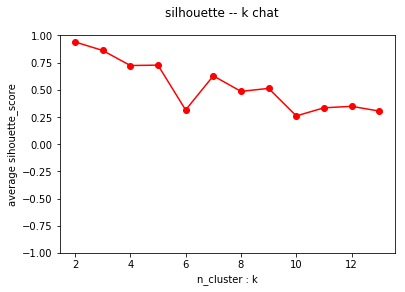

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
for n_cluster =  2 , hash_size =  2 , k =  1 , vipno_pos =  6 , knn =  [1595151786686]
output:  1595151786686
Same cluster

for n_cluster =  2 , hash_size =  2 , k =  2 , vipno_pos =  6 , knn =  [1590142175272, 1591016151613]
output:  1590142175272
Same cluster
output:  1591016151613
Same cluster

for n_cluster =  2 , hash_size =  2 , k =  3 , vipno_pos =  6 , knn =  [1595151786686, 15910161

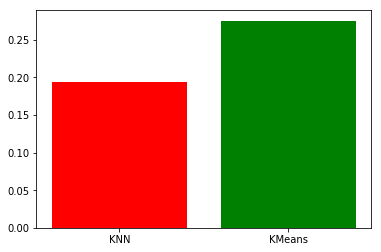

KNN: 0.193465146842418 KMeans: 0.2751865891376744


In [5]:
if __name__ == '__main__':
    data, data_array, vipno_num, vipno_len = pre_data()
    question_a(data_array, vipno_num)
    #可知当k=2时，silhouette的值最高
    km_time, kn_time = question_b(data, data_array, vipno_num, vipno_len)
    name_list = ['KNN','KMeans']  
    time_list = [kn_time, km_time]  
    color_list = ['red', 'green']
    plt.bar(range(len(time_list)), time_list,color=color_list,tick_label=name_list)  
    plt.show()  
    print("KNN:", kn_time, "KMeans:", km_time)